In [26]:
import os
import pickle

prefix = './article_pickles/'
content = [pickle.load(open(prefix + fname, 'rb')) for fname in sorted(os.listdir(prefix))]
content = [[w for w in doc if len(w) < 20] for doc in content]

In [27]:
import pandas as pd
def to_seconds_from_epoch(fname):
    return (pd.to_datetime(fname.split('_')[0]) - pd.Timestamp("1970-01-01", tz='UTC')) // pd.Timedelta('1s')
timestamps = [to_seconds_from_epoch(fname) for fname in sorted(os.listdir(prefix))]

In [36]:
import importlib
import topics_over_time
from topics_over_time.tot import TopicsOverTime

In [37]:
tot = topics_over_time.tot.TopicsOverTime()
vocab = set()
for doc in content:
    for word in doc:
        if word not in vocab:
            vocab.add(word)
timestamp_range = timestamps[-1] - timestamps[0]
timestamps_scaled = [(t - timestamps[0]) / timestamp_range for t in timestamps]
vocab = list(vocab)

In [51]:
import scipy
import random
import numpy as np

par = {}						# dictionary of all parameters
par['max_iterations'] = 100		# max number of iterations in gibbs sampling
par['T'] = 20					# number of topics
par['D'] = len(content)
par['V'] = len(vocab)
par['N'] = [len(doc) for doc in content]
par['alpha'] = [50.0/par['T'] for _ in range(par['T'])]
par['beta'] = [0.1 for _ in range(par['V'])]
par['beta_sum'] = sum(par['beta'])
par['psi'] = [[1 for _ in range(2)] for _ in range(par['T'])]
par['betafunc_psi'] = [scipy.special.beta( par['psi'][t][0], par['psi'][t][1] ) for t in range(par['T'])]
par['word_id'] = {word: idx for idx, word in enumerate(vocab)}
par['word_token'] = vocab
par['z'] = [np.random.randint(0, par['T'], par['N'][d]) for d in range(par['D'])]
par['t'] = [timestamps[d] * np.ones(par['N'][d]) for d in range(par['D'])]
par['w'] = [[par['word_id'][content[d][i]] for i in range(par['N'][d])] for d in range(par['D'])]
par['m'] = [np.zeros(par['T']) for d in range(par['D'])]
par['n'] = [np.zeros(par['V']) for t in range(par['T'])]
par['n_sum'] = np.zeros(par['T'])
np.set_printoptions(threshold=np.inf)
np.seterr(divide='ignore', invalid='ignore')
tot.CalculateCounts(par)


In [ ]:
theta, phi, psi = tot.TopicsOverTimeGibbsSampling(par)


Done with iteration 0 and document 0
Done with iteration 0 and document 1000
Done with iteration 0 and document 2000
Done with iteration 0 and document 3000
Done with iteration 0 and document 4000
Done with iteration 0 and document 5000
Done with iteration 0 and document 6000


In [ ]:
import pickle
pickle.dump((theta, phi, psi), open('theta_phi_psi_run_1.pkl', 'wb'))

In [53]:
3 * np.ones(5)

array([3., 3., 3., 3., 3.])

In [54]:
a = [timestamps[d] * np.ones(par['N'][d]) for d in range(par['D'])]
b = [[timestamps[d] for _ in range(par['N'][d])] for d in range(par['D'])]

In [55]:
len(a)

25860

In [66]:
len(a[0])== len(b[0])

True

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [68]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[1.5, 2.5], [3.5, 4.5]])

np.sum([a, b], axis=0)

array([[2.5, 4.5],
       [6.5, 8.5]])

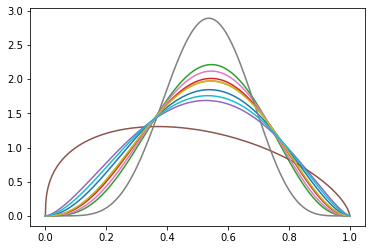

In [116]:
import pickle
import matplotlib.pyplot as plt
import math
p = pickle.load(open('tot_run_wiki/tot_dump_28.pkl', 'rb'))
psi = p['psi']

xs = np.linspace(0, 1, num=1000)
fig, ax = plt.subplots()

for i in range(len(psi)):
    ys = [math.pow(1-x, psi[i][0]-1) * math.pow(x, psi[i][1]-1) / scipy.special.beta(psi[i][0],psi[i][1]) for x in xs]
    ax.plot(xs, ys, label='Topic ' + str(i+1))
plt.show()

In [117]:
for idx, col in enumerate(p['word_topic_assignments']):
    indices = np.argpartition(col, -20)[-20:]
    print([p['dictionary'][d] for d in indices])

['staff', 'sample', 'accessdateoctober', 'circus', 'mdash', 'datenovember', 'namefoxnews', 'femme', 'publisherpeoplecom', 'dateoctober', 'fatale', 'blackout', 'accessdateaugust', 'influence', 'accessdatemay', 'dateseptember', 'aligncenter', 'rowspan', 'multilisten', 'accessdatejune']
['teenage', 'mdash', 'datenovember', 'multilisten', 'accessdateaugust', 'namefoxnews', 'dateseptember', 'circus', 'influence', 'publisherpeoplecom', 'rowspan', 'sample', 'blackout', 'fatale', 'femme', 'accessdatemay', 'dateoctober', 'aligncenter', 'accessdateoctober', 'accessdatejune']
['staff', 'teenage', 'influence', 'accessdateoctober', 'accessdateaugust', 'accessdatemay', 'accessdatejune', 'datenovember', 'dateseptember', 'multilisten', 'namefoxnews', 'blackout', 'aligncenter', 'circus', 'fatale', 'publisherpeoplecom', 'sample', 'rowspan', 'dateoctober', 'femme']
['mdash', 'staff', 'influence', 'accessdateoctober', 'aligncenter', 'publisherpeoplecom', 'namefoxnews', 'fatale', 'dateseptember', 'datenove